In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pickle

In [2]:
f = h5py.File("param_sweep.hdf5")

w_sor  = {}
w_ssor = {}
w_wj   = {}

In [3]:
list(f.keys())

['sor', 'ssor', 'weighted_jacobi']

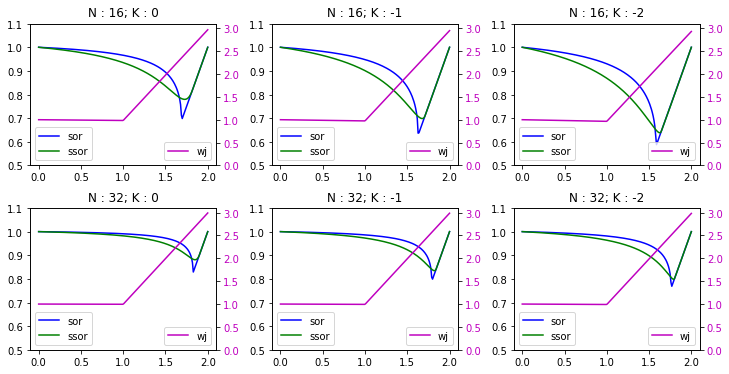

In [4]:
plt.rcParams["figure.figsize"] = (12,6)
fig,axarr = plt.subplots(2,3)
for i in [0,1]:
    for j in [0,1,2]:
        n = (i+1)*16
        k = j*-1
        e_sor  = []
        i_sor  = []
        r_sor  = []
        e_ssor = []
        i_ssor = []
        r_ssor = []
        e_wj   = []
        i_wj   = []
        r_wj = []
        
        W = np.linspace(0,2,200)
        
        for w in W:
            e_sor.append(np.max(f['/sor/eigvals_'+str(n)+'_'+str(k)+'_'+str(w)][:]))
            i_sor.append(len(f['/sor/residue_'+str(n)+'_'+str(k)+'_'+str(w)][:]))
            e_ssor.append(np.max(f['/ssor/eigvals_'+str(n)+'_'+str(k)+'_'+str(w)][:]))    
            i_ssor.append(len(f['/ssor/residue_'+str(n)+'_'+str(k)+'_'+str(w)][:]))
            e_wj.append(np.max(f['/weighted_jacobi/eigvals_'+str(n)+'_'+str(k)+'_'+str(w)][:]))
            i_wj.append(len(f['/weighted_jacobi/residue_'+str(n)+'_'+str(k)+'_'+str(w)][:]))
        
        w_ = W[np.where(i_sor==np.min(i_sor))]
        w_sor[str(n)+'_'+str(k)] = w_[0]
        
        w_ = W[np.where(i_ssor==np.min(i_ssor))]
        w_ssor[str(n)+'_'+str(k)] = w_[0]
        
        w_ = W[np.where(i_wj==np.min(i_wj))]
        w_wj[str(n)+'_'+str(k)] = w_[0]
        
        
        axarr[i,j].plot(W,e_sor,'b-',label='sor')
        axarr[i,j].plot(W,e_ssor,'g-',label='ssor')
        axtwin = axarr[i,j].twinx()
        axtwin.plot(W,e_wj,'m-',label='wj')
        axarr[i,j].set_ylim(0.5,1.1)
        axtwin.set_ylim(0,3.1)
        axtwin.tick_params(axis='y', labelcolor='m')
        axtwin.legend(loc=4)
        axarr[i,j].legend(loc=3)
        axarr[i,j].set_title("N : "+str(n)+"; K : "+str(k))
        axarr[i,j].title.set_y(1.01)
        
fig.subplots_adjust(hspace=0.3)
fig.subplots_adjust(wspace=0.3)
fig.set_size_inches(12, 6, forward=True)
plt.savefig("param_sweep.png")

In [5]:
f.close()

In [8]:
w_wj

{'16_0': 0.9949748743718593,
 '16_-1': 0.9849246231155779,
 '16_-2': 0.9849246231155779,
 '32_0': 0.9949748743718593,
 '32_-1': 0.9949748743718593,
 '32_-2': 0.9949748743718593}

In [9]:
w_sor['64_0']  = 1.9081632653061225
w_sor['64_-1'] = 1.9081632653061225
w_sor['64_-2'] = 1.9081632653061225

w_ssor['64_0']  = 1.9166666666666665
w_ssor['64_-1'] = 1.8958333333333333
w_ssor['64_-2'] = 1.875


w_wj['64_0']  = 0.9966666666666667
w_wj['64_-1'] = 0.9966666666666667
w_wj['64_-2'] = 0.9966666666666667

In [10]:
pickle.dump(w_sor,open('w_sor.pickle','wb'))
pickle.dump(w_ssor,open('w_ssor.pickle','wb'))
pickle.dump(w_wj,open('w_wj.pickle','wb'))